### Energy-volume relations

In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt

In [2]:
potential =  'FeH-NNIP'

In [3]:
pr = Project('energy-volume')

bcc structure

In [4]:
job = pr.create.job.Lammps('minimise', delete_existing_job=True)
job.structure = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True)
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)
structure = job.get_structure(-1)
cell = structure.get_cell()
e0 = job.output.energy_tot[-1]/len(structure)

The job minimise was saved and received the ID: 10187


In [5]:
strains = np.linspace(0.90, 1.10, 9)**(1/3.)
volumes_bcc = []
energies_bcc = []

for s in strains:
    bulk = structure.copy()
    bulk.set_cell(s*cell, scale_atoms=True)
    job = pr.create.job.Lammps('bcc', delete_existing_job=True)
    job.structure = bulk
    job.potential = potential
    job.calc_minimize()
    job.run(delete_existing_job=True)
    e = job.output.energy_tot[-1]/len(bulk)
    v = job.get_structure(-1).get_volume()/len(bulk)
    energies_bcc.append(e-e0)
    volumes_bcc.append(v)

The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189
The job bcc was saved and received the ID: 10189


FCC

In [6]:
# fcc
fcc = pr.create.structure.bulk('Fe', crystalstructure='fcc', a = 3.66, cubic=True)
job = pr.create.job.Lammps('fcc',delete_existing_job=True)
job.structure = fcc
job.potential = potential
job.calc_minimize(pressure=0)
job.run(delete_existing_job=True)
structure = job.get_structure(-1)

strains = np.linspace(0.90, 1.10, 9)**(1/3.)
volumes_fcc = []
energies_fcc = []

for s in strains:
    bulk = structure.copy()
    cell = bulk.get_cell()
    bulk.set_cell(s*cell, scale_atoms=True)
    job = pr.create.job.Lammps('fcc', delete_existing_job=True)
    job.structure = bulk
    job.potential = potential
    job.calc_minimize()
    job.run(delete_existing_job=True)
    e = job.output.energy_tot[-1]/len(bulk)
    v = job.get_structure(-1).get_volume()/len(bulk)
    energies_fcc.append(e-e0)
    volumes_fcc.append(v)

The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191
The job fcc was saved and received the ID: 10191


HCP

In [7]:
# hcp
hcp = pr.create.structure.bulk('Fe', crystalstructure='hcp', a = 2.43, c= 3.84)
job = pr.create.job.Lammps('hcp', delete_existing_job=True)
job.structure = hcp
job.potential = potential
job.calc_minimize(pressure=0)
job.run(delete_existing_job=True)
structure = job.get_structure(-1)

strains = np.linspace(0.90, 1.10, 9)**(1/3.)
volumes_hcp = []
energies_hcp = []

for s in strains:
    bulk = structure.copy()
    cell = bulk.get_cell()
    bulk.set_cell(s*cell, scale_atoms=True)
    job = pr.create.job.Lammps('hcp', delete_existing_job=True)
    job.structure = bulk
    job.potential = potential
    job.calc_minimize()
    job.run(delete_existing_job=True)
    e = job.output.energy_tot[-1]/len(bulk)
    v = job.get_structure(-1).get_volume()/len(bulk)
    energies_hcp.append(e-e0)
    volumes_hcp.append(v)

The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192
The job hcp was saved and received the ID: 10192


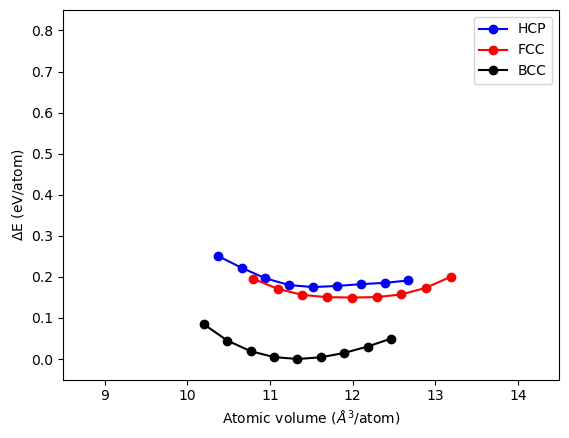

In [10]:
plt.plot(volumes_hcp, energies_hcp, marker='o', label='HCP', color = 'blue')
plt.plot(volumes_fcc, energies_fcc, marker='o', label='FCC', color = 'red')
plt.plot(volumes_bcc, energies_bcc, marker='o', label='BCC', color = 'black')
plt.ylim(-0.05, 0.85)
plt.xlim(8.5, 14.5)
plt.xlabel(r'Atomic volume ($\AA^3$/atom)')
plt.ylabel(r'$\Delta$E (eV/atom)')
plt.legend()
plt.show()

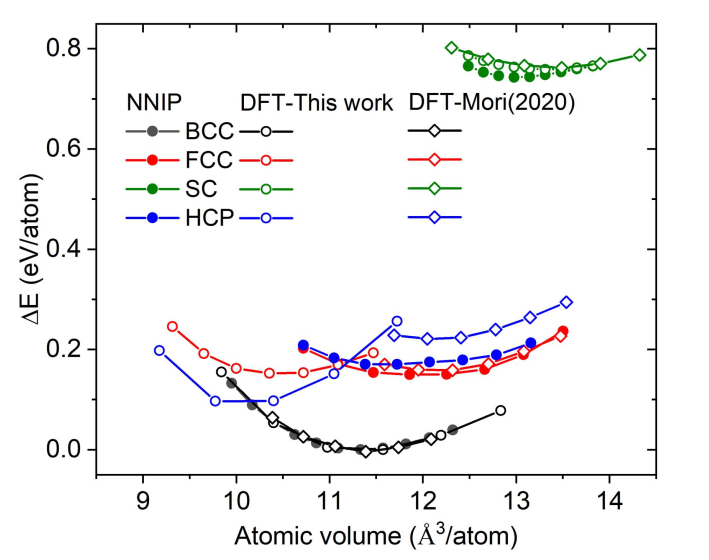